In [1]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [2]:
! cp kaggle.json ~/.kaggle/

In [3]:
! chmod 600 ~/.kaggle/kaggle.json

In [4]:
! kaggle datasets download -d muratkokludataset/rice-image-dataset

rice-image-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
! unzip rice-image-dataset.zip 

Görüntülenen çıkış son 5000 satıra kısaltıldı.
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (55).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (550).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5500).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5501).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5502).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5503).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5504).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5505).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5506).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5507).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5508).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5509).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (551).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5510).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karac

In [6]:
rice_path = "/content/Rice_Image_Dataset"

In [7]:
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout,BatchNormalization
from keras.models import Sequential
import pandas as pd
from sklearn.metrics import confusion_matrix
import itertools

In [8]:
image_gen = ImageDataGenerator(
    rescale = 1.0/255.0,
    validation_split=0.2
)
train_batches = image_gen.flow_from_directory(
    directory = rice_path,
    target_size=(128,128),
    batch_size = 32,
    subset='training',
    class_mode='categorical'
)
validation_batches = image_gen.flow_from_directory(
    directory = rice_path,
    target_size = (128,128),
    batch_size = 32,
    subset = 'validation',
    class_mode='categorical'
)

Found 60000 images belonging to 5 classes.
Found 15000 images belonging to 5 classes.


In [9]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 32, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [10]:
train_batches.class_indices

{'Arborio': 0, 'Basmati': 1, 'Ipsala': 2, 'Jasmine': 3, 'Karacadag': 4}

In [11]:
imgs,labels = next(train_batches)
print(imgs.shape)
print(labels.shape)

(32, 128, 128, 3)
(32, 5)


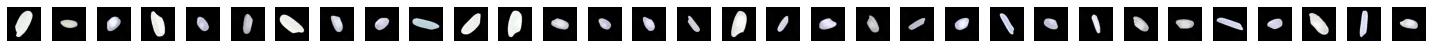

array([[0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.]], dtype=float32)

In [12]:
plotImages(imgs)
labels

In [13]:
model = Sequential()
model.add(Conv2D(16,kernel_size=(3,3),input_shape=(128,128,3),activation='relu'))
model.add(MaxPool2D(4,4))
model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32,activation='relu'))
model.add(Dense(5,activation='softmax'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 64)                4

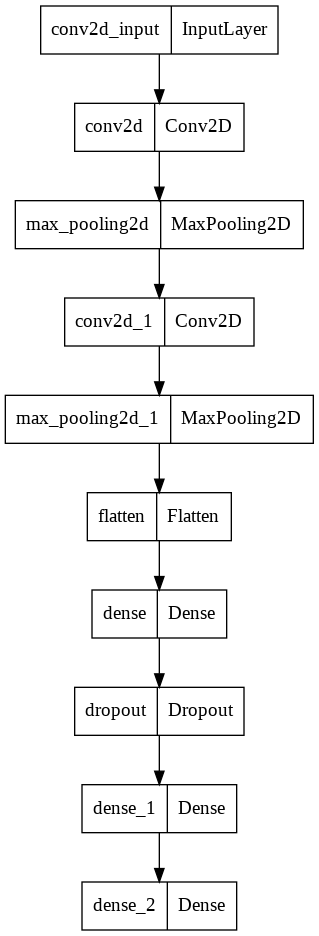

In [15]:
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=False,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=False,
)

In [16]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [17]:
model.fit(train_batches,batch_size=32,epochs=3,validation_data=validation_batches)

Epoch 1/3
1875/1875 [==============================] - 106s 55ms/step - loss: 0.2164 - accuracy: 0.9223 - val_loss: 0.0574 - val_accuracy: 0.9841
Epoch 2/3
1875/1875 [==============================] - 95s 50ms/step - loss: 0.0919 - accuracy: 0.9700 - val_loss: 0.0394 - val_accuracy: 0.9883
Epoch 3/3
1875/1875 [==============================] - 95s 51ms/step - loss: 0.0720 - accuracy: 0.9772 - val_loss: 0.0806 - val_accuracy: 0.9787


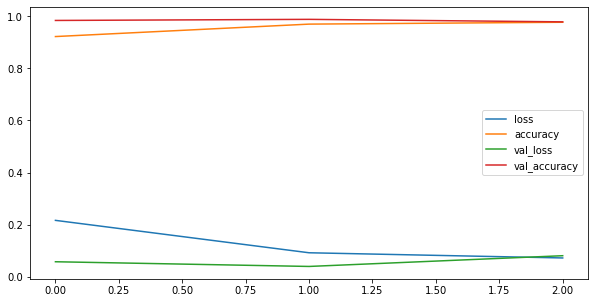

In [18]:
pd.DataFrame(model.history.history).plot(figsize=(10,5))
plt.show()

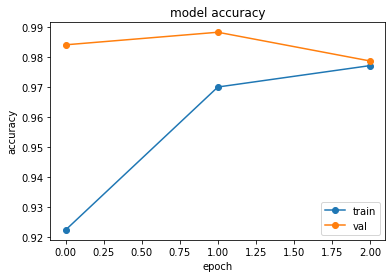

In [19]:
plt.plot(model.history.history['accuracy'], marker='o')
plt.plot(model.history.history['val_accuracy'], marker='o')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

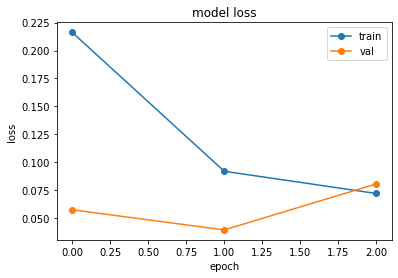

In [20]:
plt.plot(model.history.history['loss'], marker='o')
plt.plot(model.history.history['val_loss'], marker='o')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()